In [1]:
import scanpy as sp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as scp
import anndata as ad
from scipy import io as spio

# Convert .txt to .h5ad

In [ ]:
path = "/Users/manuel/Desktop/bowtie_strategy/complete_dge_matrix/expression.txt"
k = sp.read_text(path)
n_obs = len(k.var)
n_var = len(k.obs)
k_t = ad.AnnData(X=None, shape=(n_obs, n_var))
k_t.X = k.X.transpose()
k_t.obs = k.var
k_t.var = k.obs
k_t.write("/Users/manuel/Desktop/bowtie_strategy/complete_dge_matrix/expression_complete.h5ad", compression='gzip')

# Convert .mat to .h5ad

In [ ]:
matrx = spio.loadmat("/Users/manuel/OneDrive/jupyter_notebooks/scanpy_scRNA-seq_analysis/GSM3017263_same_day_cells_nuclei_300_UBCs.mat")
# create anndata object with matrix in matrx object
k_t = ad.AnnData(matrx['DGE'])
# assign genes element of matrx as pandas DataFrame to var
k_t.var = pd.DataFrame(matrx['genes'])
# assign barcode element of matrx as pandas DataFrame to obs
k_t.obs = pd.DataFrame(matrx['barcodes'])

In [ ]:
# we now want to get a dataframe that has only rownames (corresponding to gene names)
# of type str

k = k_t.var

# extract gene names
gene_names = []
for i in range(len(k)):
    gene_names.append(str(k[0][i]))

# make dictionary that maps gene names (in int16) of colum to value of rownames
my_dic = {}
old_row_names = k.index.values
for i in range(len(k)):
    my_dic[old_row_names[i]] = gene_names[i]

# change the rownames
k = k.rename(index=my_dic)

# remove the column that for some weird reason contained the gene names
k = k.drop([0], axis=1)

In [ ]:
# we now want to get a dataframe that has only rownames (corresponding to barcodes)
# of type str

uu = k_t.obs

gene_names = []
for i in range(len(uu)):
    gene_names.append(str(uu[0][i]))

my_dic = {}
old_row_names = uu.index.values
for i in range(len(uu)):
    my_dic[old_row_names[i]] = gene_names[i]
    
uu = uu.rename(index=my_dic)
uu = uu.drop([0], axis=1)

In [ ]:
# assign the row and col data back in the correct format (DataFrame with all entries
# of type str)
k_t.var = k
k_t.obs = uu

In [ ]:
output_file = "/Users/manuel/OneDrive/jupyter_notebooks/scanpy_scRNA-seq_analysis/GSM3017263_same_day_cells_nuclei_300_UBCs.h5ad"
k_t.write(output_file, compression='gzip')

# my matrix

In [7]:
input_file = "/Users/manuel/Desktop/bowtie_strategy/complete_dge_matrix/expression_complete.h5ad"
my = sp.read(input_file)

In [9]:
sp.pp.calculate_qc_metrics(my, inplace=True)

/Users/manuel/anaconda3/envs/scanpy_env/lib/python3.7/site-packages/scanpy/preprocessing/_qc.py:375: RuntimeWarning: divide by zero encountered in true_divide
  return values / sums[:, None]
/Users/manuel/anaconda3/envs/scanpy_env/lib/python3.7/site-packages/scanpy/preprocessing/_qc.py:375: RuntimeWarning: invalid value encountered in true_divide
  return values / sums[:, None]


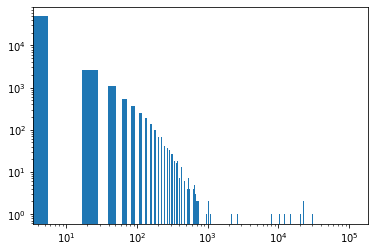

In [10]:
plt.hist(my.obs['total_counts'], 5000, histtype='bar', rwidth=0.5, align='left')
plt.yscale('log')
plt.xscale('log')

### remove cells with zero counts

In [12]:
# get vector that contains True if cell has zero counts
zero_counts = [False]*len(my.obs)
for i in range(len(my.obs)):
    if my.obs['total_counts'][i] == 0:
        zero_counts[i] = True
        
# assign this vector to dge object    
my.obs['zero_counts'] = zero_counts

# filter out cells with zero counts
my_presel_1 = my[my.obs['zero_counts'] == False, :]

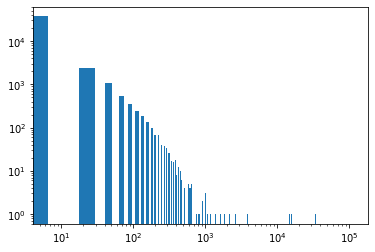

In [16]:
plt.hist(my_presel_1.obs['total_counts'], 5000, histtype='bar', rwidth=0.5, align='left')
plt.yscale('log')
plt.xscale('log')

### pre-select again

In [42]:
lower_lim = my_presel_1.obs['total_counts'] > 1
upper_lim = my_presel_1.obs['total_counts'] < 100000
my_presel_1.obs['keep'] = lower_lim & upper_lim

print(sum(lower_lim))
print(sum(upper_lim))
print(sum(my_presel_1.obs['keep']))

32683
43110
32681


In [43]:
my_presel_2 = my_presel_1[my_presel_1.obs['keep'] == True, :]

In [22]:
my_presel_2

View of AnnData object with n_obs × n_vars = 380 × 22355 
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'zero_counts', 'keep'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

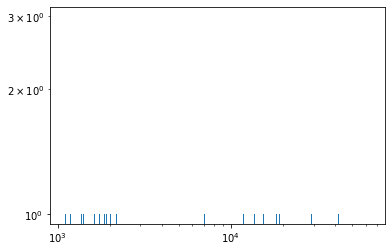

In [28]:
plt.hist(my_presel_2.obs['total_counts'], 5000, histtype='bar', rwidth=0.5, align='left')
plt.yscale('log')
plt.xscale('log')

In [ ]:
# > 5000
plt.hist(sp_frozen_presel_2.obs['total_counts'], 50, histtype='bar', rwidth=0.5, align='left')
plt.yscale('log')
plt.xscale('log')

## final pre-select

In [ ]:
lower_lim = sp_frozen_presel_1.obs['total_counts'] > 5000
upper_lim = sp_frozen_presel_1.obs['total_counts'] < 19000
sp_frozen_presel_1.obs['keep'] = lower_lim & upper_lim

print(sum(lower_lim))
print(sum(upper_lim))
print(sum(sp_frozen_presel_1.obs['keep']))

sp_frozen_presel_3 = sp_frozen_presel_1[sp_frozen_presel_1.obs['keep'] == True, :]

## plotting pre-selection

In [ ]:
fig, axes = plt.subplots(2,2, figsize = (12,6))

axes[0][0].hist(sp_frozen.obs['total_counts'], 5, histtype='bar', rwidth=0.5, align='left')
axes[0][0].set_yscale('log')
axes[0][0].set_xscale('log')
axes[0][0].set_ylabel("frequency")
axes[0][0].set_xlabel("total counts")

axes[0][1].hist(sp_frozen_presel_1.obs['total_counts'], 50, histtype='bar', rwidth=0.5, align='left')
axes[0][1].set_yscale('log')
axes[0][1].set_xscale('log')
axes[0][1].set_ylabel("frequency")
axes[0][1].set_xlabel("total counts")

axes[1][0].hist(sp_frozen_presel_2.obs['total_counts'], 100, histtype='bar', rwidth=0.5, align='left')
axes[1][0].set_ylabel("frequency")
axes[1][0].set_xlabel("total counts")

axes[1][1].hist(sp_frozen_presel_3.obs['total_counts'], 20, histtype='bar', rwidth=0.5, align='left')
axes[1][1].set_ylabel("frequency")
axes[1][1].set_xlabel("total counts")

fig.tight_layout()

plt.savefig('testplot.png', dpi=500)

## QC metrics

In [ ]:
sp.pp.calculate_qc_metrics(sp_frozen_presel_3, inplace=True)

In [ ]:
sp.pl.highest_expr_genes(sp_frozen_presel_3, n_top=20, )

In [ ]:
mito_genes = sp_frozen_presel_3.var_names.str.startswith('mt')
print(np.sum(mito_genes))
sp_frozen_presel_3.obs['percent_mito'] = np.sum(sp_frozen_presel_3[:, mito_genes].X, axis=1) / np.sum(sp_frozen_presel_3.X, axis=1)

In [ ]:
sp.pl.violin(sp_frozen_presel_2, ['n_genes_by_counts', 'total_counts', 'percent_mito'],
             jitter=0.4, multi_panel=True)

In [ ]:
fig, axes = plt.subplots(1,2, figsize = (12,4))
axes[0].scatter(sp_frozen_presel_2.obs["total_counts"], sp_frozen_presel_2.obs["n_genes_by_counts"], color='r')
axes[0].grid(True)
axes[0].set_ylabel("number of genes")
axes[0].set_xlabel("total counts")
axes[1].scatter(sp_frozen_presel_2.obs["total_counts"], sp_frozen_presel_2.obs["percent_mito"], color='r')
axes[1].grid(True)
axes[1].set_ylabel("percent mito genes")
axes[1].set_xlabel("total counts")

# original matrix

### count distribution

In [6]:
input_file = "/Users/manuel/OneDrive/jupyter_notebooks/scanpy_scRNA-seq_analysis/GSM3017265_frozen_preserved_cells_nuclei_200_UBCs.h5ad"
orig = sp.read(input_file)

In [8]:
sp.pp.calculate_qc_metrics(orig, inplace=True)

In [ ]:
barcodes_orig = [barcode.split('_')[0] for barcode in k_t.obs.index]

In [ ]:
k_t.obs['total_counts'] = np.sum(k_t.X, axis=1)

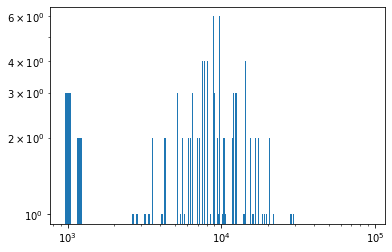

In [4]:
plt.hist(k_t.obs['total_counts'], 500, histtype='bar', rwidth=0.5, align='left')
plt.yscale('log')
plt.xscale('log')

In [17]:
orig

AnnData object with n_obs × n_vars = 203 × 63940 
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

In [ ]:
sp.pl.highest_expr_genes(k_t, n_top=20)

## 

In [ ]:
mito_genes_mouse = k_t.var_names.str.startswith('mt')

mito_genes_human = k_t.var_names.str.startswith('MT')

mito_genes = [False]*len(k_t.var)
for i in range(len(k_t.var)):
    if mito_genes_mouse[i] or mito_genes_human[i]:
        mito_genes[i] = True

print(sum(mito_genes))


k_t.obs['percent_mito'] = np.sum(k_t[:, mito_genes].X, axis=1) / np.sum(k_t.X, axis=1)

In [ ]:
sp.pl.violin(k_t, ['n_genes_by_counts', 'total_counts', 'percent_mito'],
             jitter=0.4, multi_panel=True)

In [ ]:
fig, axes = plt.subplots(2,3, figsize = (10, 6))

#--------------
#original data

axes[0][0].violinplot(k_t.obs['total_counts'], points=40, widths=0.5, 
                      bw_method='silverman')
axes[0][0].set_title("total counts", size='xx-large')

axes[0][1].violinplot(k_t.obs['n_genes_by_counts'], points=40, widths=0.5, 
                      bw_method='silverman')
axes[0][1].set_title("no. genes per count", size='xx-large')

axes[0][2].violinplot(k_t.obs['percent_mito'], points=40, widths=0.5, 
                      bw_method='silverman')
axes[0][2].set_title("% mito genes", size='xx-large')


#--------
#my data

axes[1][0].violinplot(sp_frozen_presel_3.obs['total_counts'], points=40, widths=0.5, 
                      bw_method='silverman')

axes[1][1].violinplot(sp_frozen_presel_3.obs['n_genes_by_counts'], points=40, widths=0.5, 
                      bw_method='silverman')

axes[1][2].violinplot(sp_frozen_presel_3.obs['percent_mito'], points=40, widths=0.5, 
                      bw_method='silverman')


fig.tight_layout()

plt.savefig('QC_metrics_1.png', dpi=500)

In [ ]:
fig, axes = plt.subplots(2,2, figsize = (12,8))

#--------------
#original data

axes[0][0].scatter(k_t.obs["total_counts"], k_t.obs["n_genes_by_counts"], color='r')
axes[0][0].grid(True)
axes[0][0].set_ylabel("number of genes")
axes[0][0].set_xlabel("total counts")
axes[0][0].set_title("genes vs. total counts", size='xx-large')

axes[0][1].scatter(k_t.obs["total_counts"], k_t.obs["percent_mito"], color='r')
axes[0][1].grid(True)
axes[0][1].set_ylabel("percent mito genes")
axes[0][1].set_xlabel("total counts")
axes[0][1].set_title("% mito genes vs. total counts", size='xx-large')

#--------
#my data

axes[1][0].scatter(sp_frozen_presel_3.obs["total_counts"], sp_frozen_presel_3.obs["n_genes_by_counts"], color='r')
axes[1][0].grid(True)
axes[1][0].set_ylabel("number of genes")
axes[1][0].set_xlabel("total counts")

axes[1][1].scatter(sp_frozen_presel_3.obs["total_counts"], sp_frozen_presel_3.obs["percent_mito"], color='r')
axes[1][1].grid(True)
axes[1][1].set_ylabel("percent mito genes")
axes[1][1].set_xlabel("total counts")

fig.tight_layout()


plt.savefig('QC_metrics_2.png', dpi=500)

### PCA plot

In [44]:
k_t = my_presel_2
sp.pp.normalize_total(k_t, target_sum=1e4)
sp.pp.log1p(k_t)
sp.pp.highly_variable_genes(k_t, min_mean=0.0125, max_mean=3, min_disp=0.5)
k_t_hvg = k_t[:, k_t.var.highly_variable]
k_t_hvg

/Users/manuel/anaconda3/envs/scanpy_env/lib/python3.7/site-packages/scanpy/preprocessing/_simple.py:285: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(data)


View of AnnData object with n_obs × n_vars = 32681 × 10166 
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'zero_counts', 'keep'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'

/Users/manuel/anaconda3/envs/scanpy_env/lib/python3.7/site-packages/scanpy/preprocessing/_simple.py:869: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


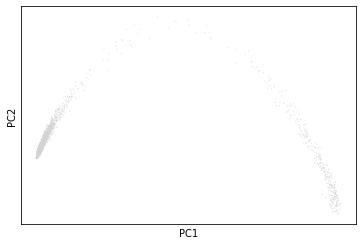

In [45]:
sp.pp.scale(k_t_hvg, max_value=10)
sp.tl.pca(k_t_hvg, svd_solver='arpack')
sp.pl.pca(k_t_hvg)

/Users/manuel/anaconda3/envs/scanpy_env/lib/python3.7/site-packages/numba/typed_passes.py:271: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../anaconda3/envs/scanpy_env/lib/python3.7/site-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  state.func_ir.loc))
/Users/manuel/anaconda3/envs/scanpy_env/lib/python3.7/site-packages/umap/nndescent.py:92: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../ana

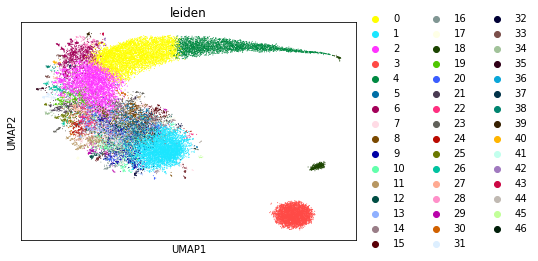

In [46]:
sp.pp.neighbors(k_t_hvg, n_neighbors=10, n_pcs=40)
sp.tl.umap(k_t_hvg)
sp.tl.leiden(k_t_hvg)
sp.pl.umap(k_t_hvg, color='leiden')

In [ ]:
sp.tl.tsne(k_t_hvg)

# my matrix

### PCA plot

In [ ]:
sp.pp.normalize_total(sp_frozen_presel_3, target_sum=1e4)
sp.pp.log1p(sp_frozen_presel_3)
sp.pp.highly_variable_genes(sp_frozen_presel_3, min_mean=0.0125, max_mean=3, min_disp=0.5)
sp_frozen_presel_3_hvg = sp_frozen_presel_3[:, sp_frozen_presel_3.var.highly_variable]
sp_frozen_presel_3_hvg

In [ ]:
sp.pp.scale(sp_frozen_presel_3_hvg, max_value=10)
sp.tl.pca(sp_frozen_presel_3_hvg, svd_solver='arpack', n_comps=100)
sp.pl.pca(sp_frozen_presel_3_hvg)

### UMAP plot and Leiden clustering

In [ ]:
sp.pp.neighbors(sp_frozen_presel_3_hvg, n_neighbors=30, n_pcs=50)
sp.tl.umap(sp_frozen_presel_3_hvg)
sp.tl.leiden(sp_frozen_presel_3_hvg)
sp.pl.umap(sp_frozen_presel_3_hvg, color='leiden')

In [ ]:
sp.tl.tsne(sp_frozen_presel_3_hvg)

# -------------------------------------


### extract PCA data

In [ ]:
# Original Data
length = len(k_t_hvg.obs)
PC1_orig = [0]*length
PC2_orig = [0]*length

for i in range(length):
    PC1_orig[i] = k_t_hvg.obsm['X_pca'][i][0]
    PC2_orig[i] = k_t_hvg.obsm['X_pca'][i][1]

# My Data
length = len(sp_frozen_presel_3_hvg.obs)
PC1_my = [0]*length
PC2_my = [0]*length

for i in range(length):
    PC1_my[i] = sp_frozen_presel_3_hvg.obsm['X_pca'][i][0]
    PC2_my[i] = sp_frozen_presel_3_hvg.obsm['X_pca'][i][1]

### extract UMAP data

In [ ]:
# original data
length = len(k_t_hvg.obsm["X_umap"])
u1_orig = [0]*length
u2_orig = [0]*length

for i in range(length):
    u1_orig[i] = k_t_hvg.obsm["X_umap"][i][0]
    u2_orig[i] = k_t_hvg.obsm["X_umap"][i][1]

    
# my data
length = len(sp_frozen_presel_3_hvg.obsm["X_umap"])
u1_my = [0]*length
u2_my = [0]*length

for i in range(length):
    u1_my[i] = sp_frozen_presel_3_hvg.obsm["X_umap"][i][0]
    u2_my[i] = sp_frozen_presel_3_hvg.obsm["X_umap"][i][1]

### extract t-SNE data

In [ ]:
# original data
length = len(k_t_hvg.obsm["X_tsne"])
t1_orig = [0]*length
t2_orig = [0]*length

for i in range(length):
    t1_orig[i] = k_t_hvg.obsm["X_tsne"][i][0]
    t2_orig[i] = k_t_hvg.obsm["X_tsne"][i][1]

# my data
length = len(sp_frozen_presel_3_hvg.obsm["X_tsne"])
t1_my = [0]*length
t2_my = [0]*length

for i in range(length):
    t1_my[i] = sp_frozen_presel_3_hvg.obsm["X_tsne"][i][0]
    t2_my[i] = sp_frozen_presel_3_hvg.obsm["X_tsne"][i][1]

### extract Leiden clustering data

In [ ]:
# original data
length = len(k_t_hvg.obs)
cluster_no_orig = [0]*length

for i in range(length):
    cluster_no_orig[i] = int(k_t_hvg.obs['leiden'][i])

    
# my data
length = len(sp_frozen_presel_3_hvg.obs)
cluster_no_my = [0]*length

for i in range(length):
    cluster_no_my[i] = int(sp_frozen_presel_3_hvg.obs['leiden'][i])

# Summary plots

In [ ]:
fig, axes = plt.subplots(2,3, figsize = (12,6))

#--------------
#original data

axes[0][0].scatter(PC1_orig, PC2_orig, c=cluster_no_orig, s=100, cmap='hsv', 
            edgecolor='black', linewidth=1, alpha=0.75)
axes[0][0].set_ylabel("PC2")
axes[0][0].set_xlabel("PC1")
axes[0][0].set_title("PCA", size='xx-large')

axes[0][1].scatter(u1_orig, u2_orig, s=100, c=cluster_no_orig, cmap='hsv', 
            edgecolor='black', linewidth=1, alpha=0.75)
axes[0][1].set_ylabel("UMAP2")
axes[0][1].set_xlabel("UMAP1")
axes[0][1].set_title("UMAP", size='xx-large')

axes[0][2].scatter(t1_orig, t2_orig, s=100, c=cluster_no_orig, cmap='hsv', 
            edgecolor='black', linewidth=1, alpha=0.75)
axes[0][2].set_xlabel("t-SNE1")
axes[0][2].set_ylabel("t-SNE2")
axes[0][2].set_title("t-SNE", size='xx-large')

#---------
# my data

axes[1][0].scatter(PC1_my, PC2_my,c=cluster_no_my, s=100, cmap='hsv', 
            edgecolor='black', linewidth=1, alpha=0.75)
axes[1][0].set_ylabel("PC2")
axes[1][0].set_xlabel("PC1")

axes[1][1].scatter(u1_my, u2_my, s=100, c=cluster_no_my, cmap='hsv', 
            edgecolor='black', linewidth=1, alpha=0.75)
axes[1][1].set_ylabel("UMAP2")
axes[1][1].set_xlabel("UMAP1")

axes[1][2].scatter(t1_my, t2_my, s=100, c=cluster_no_my, cmap='hsv', 
            edgecolor='black', linewidth=1, alpha=0.75)
axes[1][2].set_xlabel("t-SNE1")
axes[1][2].set_ylabel("t-SNE2")


fig.tight_layout()

plt.savefig('dim_reduction_leiden.png', dpi=500)

## how many unique barcodes?

In [ ]:
input_file = "/Users/manuel/Desktop/dge.h5ad"
sp_frozen = sp.read(input_file)

In [ ]:
unique_cbcs = get_unique_elements(sp_frozen.obs.index)

In [ ]:
len(unique_cbcs)

In [ ]:
sp_frozen

## how many barcodes are overlapping?

In [ ]:
barcodes_my = sp_frozen.obs.index

In [ ]:
# shorten barcodes to only contain R2 and R3 barcodes
barcodes_my_short = [""]*len(barcodes_my)

for i in range(len(barcodes_my)):
    barcodes_my_short[i] = barcodes_my[i][8:]

In [ ]:
barcodes_orig = [barcode.split('_')[0] for barcode in k_t.obs.index]

In [ ]:
len(barcodes_orig[0]) == len(barcodes_my_short[0])

In [ ]:
count = 0
overlap_barcodes = []

for i in range(len(barcodes_orig)):
    if  barcodes_orig[i] in barcodes_my_short:
        overlap_barcodes.append(barcodes_orig[i])
        count += 1
        
print(count)
print(len(overlap_barcodes))

In [ ]:
barcodes_orig = [barcode.split('_')[0] for barcode in k_t.obs.index]

In [ ]:
barcodes_my = [barcode.split('_')[0] for barcode in sp_frozen.obs.index]

In [ ]:
bc1_path="/Users/manuel/OneDrive/SPLiT-seq/SPLiT-seq_suite/DGE_matrix_generation/metadata/barcodes_paper/bc1_isolated.txt"
bc1 = read_from_file(input_file=bc1_path, file_type="txt")

bc2_path="/Users/manuel/OneDrive/SPLiT-seq/SPLiT-seq_suite/DGE_matrix_generation/metadata/barcodes_paper/bc2_isolated.txt"
bc2 = read_from_file(input_file=bc2_path, file_type="txt")

bc3_path="/Users/manuel/OneDrive/SPLiT-seq/SPLiT-seq_suite/DGE_matrix_generation/metadata/barcodes_paper/bc3_isolated.txt"
bc3 = read_from_file(input_file=bc3_path, file_type="txt")


In [ ]:
barcodes_my_short = [""]*len(barcodes_my)

for i in range(len(barcodes_my)):
    barcodes_my_short[i] = barcodes_my[i][8:]

In [ ]:
# create list of overlapping barcodes

count = 0
overlap_barcodes = []

for i in range(len(barcodes_orig)):
    if  barcodes_orig[i] in barcodes_my_short:
        overlap_barcodes.append(barcodes_orig[i])
        count += 1
        
print(count)
print(len(overlap_barcodes))

- R2 and R3 barcodes are exactly the same
- original data only uses R2+R3 barcodes as CBCs
- 190 out of 203 of original data are in my data  
    --> selection of cells should be good
- CBCs in my dataset are overlapping (8468 of 54834 are unique)  
    --> something went wrong during demultiplexing
    |--> could be fixxed using dropseq-tools
- more counts but less expressed genes compared to original data
    --> UMI collapsing went wrong

In [ ]:
overlap_barcodes

In [ ]:
# create boolean list that indicates whether cell in my dataset belongs to the set
# of overlapping barcodes

overlap = [False]*len(barcodes_my_short)


for i in range(len(barcodes_my_short)):
    if barcodes_my_short[i] in overlap_barcodes:
        overlap[i] = True

In [ ]:
count = 0
for i in overlap:
    count += i
    
print(count)

In [ ]:
def get_unique_elements(l):
    unique = []
    for el in l:
        if el not in unique:
            unique.append(el)
    return unique

In [ ]:
def unique_elements(l):
    unique = [True]*len(l)
    for i in range(len(l)):
        for k in range(len(l)):
            if k != i:
                if l[i] == l[k]:
                    unique[i] = False
    return unique
        

In [ ]:
def read_from_file(*args, **kwargs):
    """
    This function can be used to read content of fastq, fasta and txt files into a list. This list is returned
    by this function
    :param args: this option is not used yet
    :param kwargs: possible keyword arguments are:
    input_file --> the full path to the file that should be imported including the full file name
    input_dir --> the full path to the file that should be imported
    input_filename --> the full file name of the file that should be imported
    file_type --> the type of the file that should be imported
    fastq_reads --> an option specifying that only reads should be implemented from the fastq file

    :return:
    """
    input_dir = ''
    input_filename = ''
    input_file = ''
    input_list = []
    input_dic = {}

    if kwargs["input_file"]:  # check if input_file has been supplied to the function
        input_file = kwargs["input_file"]
    else:  # if no input file name has been supplied, look for the input directory and file name and concatenate
        input_dir = kwargs["input_dir"]
        input_filename = kwargs["input_filename"]
        input_file = input_dir + "/" + input_filename

    try:
        handler = open(input_file)
    except FileNotFoundError as exception:
        print("file was not found!!")
        print(exception)
    else:
        # importing txt file
        if kwargs["file_type"] == "txt":
            input_list = remove_newlinetag(handler.readlines())
        # importing fasta file
        elif kwargs["file_type"] == "fasta":
            input_list = remove_fasta_header(remove_newlinetag(handler.readlines()))
        # importing fastq file
        elif kwargs["file_type"] == "fastq_all":
            from Bio import SeqIO

            for record in SeqIO.parse(input_file, "fastq"):
                read_name = str(record.description)
                read_seq = str(record.seq)
                read_qual = record.letter_annotations["phred_quality"]
                input_list.append((read_name, read_seq, read_qual))

        elif kwargs["file_type"] == "sam":
            """
            structure of returned sam list:
            [ [AlignmentFile_object, query_name_number], [], ... ]
            """
            sam = pysam.AlignmentFile(input_file, "r")
            input_list = []
            for query in sam.fetch():
                # query_no = query.query_name.split(".")[1]
                input_list.append([query, query.query_name])

    return input_list

In [ ]:
def remove_newlinetag(some_list):
    some_list_newlineremoved = []
    for entry in some_list:
        some_list_newlineremoved.append(entry.rstrip())

    return some_list_newlineremoved

In [ ]:
def remove_fasta_header(some_list):
    return some_list[1:]

In [ ]:
path = "/Users/manuel/Downloads/GSM3017264_frozen_preserved_cells_nuclei_1000_UBCs.mat"

matrx = spio.loadmat(path)

print(matrx['barcodes'][0])
print(len(matrx['barcodes'][0]) - 3)